<a href="https://colab.research.google.com/github/abrahammathews2000/Pulsars-Pdot_vs_P_plot/blob/main/Pulsar_PdotP_plot_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pulsars**

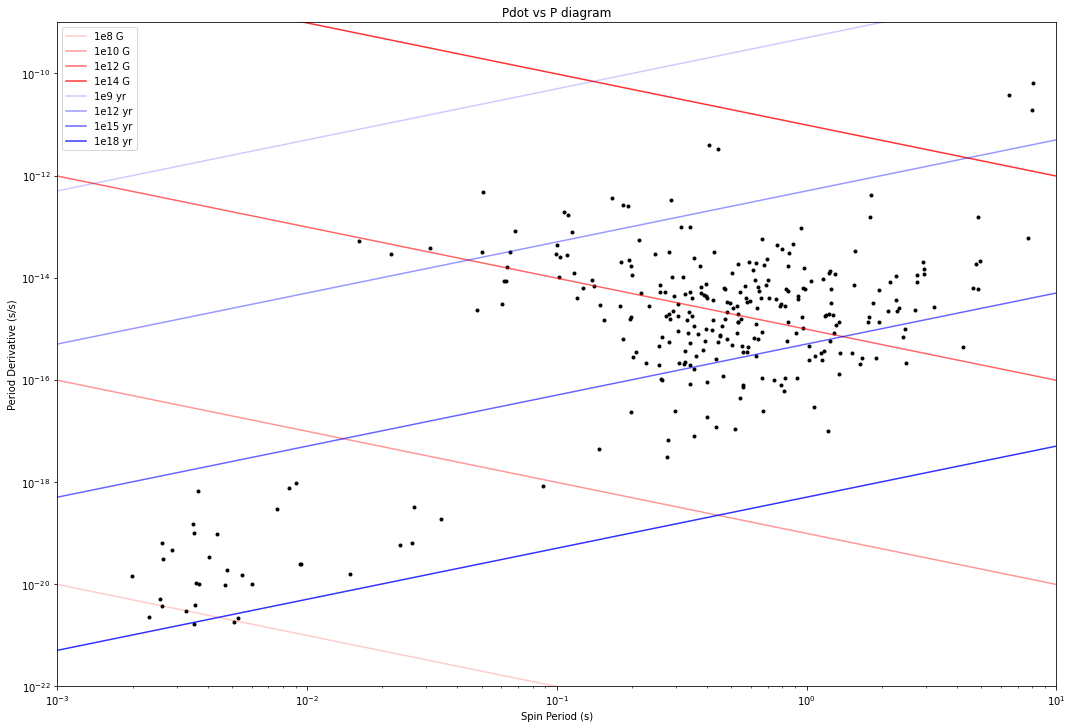

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = "https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/pulsar_300.txt" 
dataTable = pd.read_table(file, sep='\s+', engine='python', header = None,names=["PSR","Name","Period","Period dot"],comment ='#',index_col=False)
dataTable.head(5)

plt.figure(figsize=(15,10))
plt.scatter(dataTable["Period"],dataTable["Period dot"],c="black",marker = ".")
#plt.scatter(x2, y2, c ="yellow", linewidths = 2,marker ="^", edgecolor ="red", s = 200)

plt.xscale("log")
plt.yscale("log")

plt.xlim(1e-3,1e1)
plt.ylim(1e-22,1e-9)
plt.xlabel("Spin Period (s)")
plt.ylabel("Period Derivative (s/s)")



#Plot constant magnetic field constant
def magnetic_locus(P,B):
    P_dot = (pow(B,2)/(pow((3.2*1e19),2)*P))
    return(P_dot)

#mag_locus = magnetic_locus(dataTable["Period"],1e8)
Period = np.logspace(-3,1,1000)

plt.plot(Period,magnetic_locus(Period,1e8), label = "1e8 G",color = 'red',alpha=0.2)
plt.plot(Period,magnetic_locus(Period,1e10), label = "1e10 G",color = 'red',alpha=0.4)
plt.plot(Period,magnetic_locus(Period,1e12), label = "1e12 G",color = 'red',alpha=0.6)
plt.plot(Period,magnetic_locus(Period,1e14), label = "1e14 G",color = 'red',alpha=0.8)

#Plot locus of constant ages
def age_locus(P,tau):
    P_dot = P/(2*tau)
    return(P_dot)
plt.plot(Period,age_locus(Period,1e9), label = "1e9 yr",color = 'blue',alpha=0.2)
plt.plot(Period,age_locus(Period,1e12), label = "1e12 yr",color = 'blue',alpha=0.4)
plt.plot(Period,age_locus(Period,1e15), label = "1e15 yr",color = 'blue',alpha=0.6)
plt.plot(Period,age_locus(Period,1e18), label = "1e18 yr",color = 'blue',alpha=0.8)

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Pdot vs P diagram")
plt.show()

col1      Pulsar            Period        Period_dot Pulsar type col6
---- --------------- ------------------- ----------- ----------- ----
  --  PSR J0002+6216      0.115363568268 5.96703e-15          HE   --
  --  PSR J0006+1834       0.69374767047   2.097e-15           R   --
  --  PSR J0007+7303        0.3158731909  3.6039e-13        NRAD   --
  --  PSR J0014+4746      1.240699038946  5.6446e-16           R   --
  --  PSR J0021-0909       2.31413082909   1.039e-15           R   --
  --  PSR J0023+0923 0.00305020310475439 1.14235e-20          HE   --
  -- PSR J0024-7204E 0.00353632915276244 9.85103e-20           R   --
  -- PSR J0024-7204F 0.00262357935251262 6.45029e-20           R   --
  -- PSR J0024-7204O 0.00264334329724357 3.03493e-20           R   --
  -- PSR J0024-7204P        0.0036430207     6.6e-19           R   --
 ...             ...                 ...         ...         ...  ...
  --  PSR J1525-5417       1.01169421772  1.6174e-14           R   --
  --  PSR J1525-5523

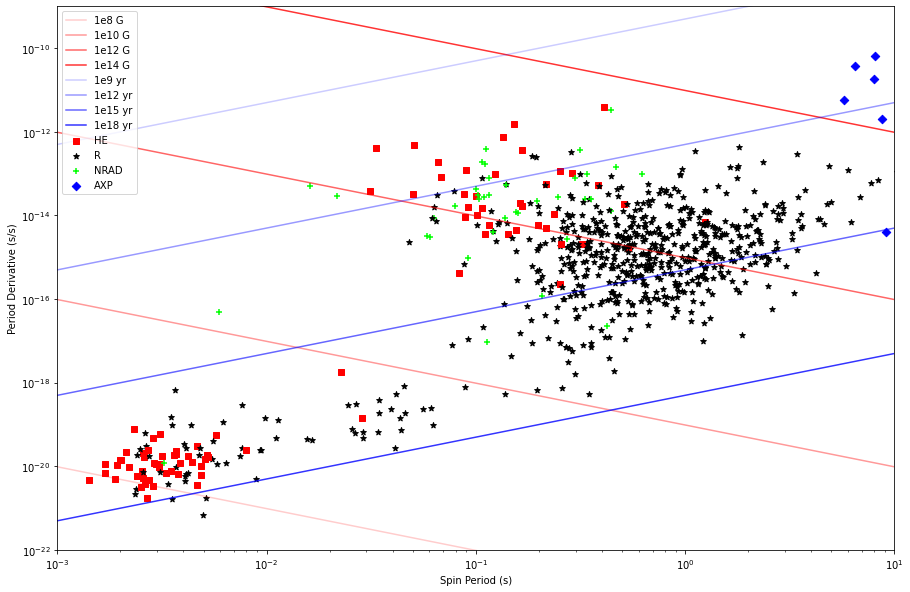

In [2]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

file = "https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/1000_pulsars.txt"

df =ascii.read(file)

#To remove missing values
df = df[~df['col3'].mask]
df = df[~df['col4'].mask]


df.rename_column('col2', 'Pulsar')
df.rename_column('col3', 'Period')
df.rename_column('col4', 'Period_dot')
df.rename_column('col5', 'Pulsar type')
period = df['Period'].astype(float)
p_dot = df['Period_dot'].astype(float)
p_type = df['Pulsar type'].astype(str)

j=0
for i in range(len(p_dot)):
    if(p_dot[i]<=0):
        df.remove_row(i-j)
        j=j+1

AxpIndex=0
RIndex = 0
NRADIndex = 0
HEIndex = 0
OTHERIndex = 0

for i in range(len(p_dot)):
    if(p_type[i]=='AXP,NRAD' or p_type[i]=='AXP'):
        if(AxpIndex==0):
            plt.scatter(period[i],p_dot[i],c='blue',marker = "D",label="AXP")
        else:
            plt.scatter(period[i], p_dot[i], c='blue', marker="D")
        AxpIndex += 1
    elif (p_type[i] == 'R'):
        if (RIndex==0):
            plt.scatter(period[i],p_dot[i],c='black',marker = "*", label="R")
        else:
            plt.scatter(period[i],p_dot[i],c='black',marker = "*")
        RIndex += 1

    elif (p_type[i] == 'NRAD'):
        if (NRADIndex==0):
            plt.scatter(period[i], p_dot[i], c='lime', marker="+", label="NRAD")
        else:
            plt.scatter(period[i], p_dot[i], c='lime', marker="+")
        NRADIndex += 1
    elif (p_type[i] == 'HE'):
        if (HEIndex==0):
            plt.scatter(period[i], p_dot[i], c='red', marker="s", label="HE")
        else:
            plt.scatter(period[i], p_dot[i], c='red', marker="s")
        HEIndex += 1
    else:
        if (OTHERIndex==0):
            plt.scatter(period[i], p_dot[i], c="orange", marker ="x", label="HE")
        else:
            plt.scatter(period[i], p_dot[i], c="orange", marker ="x")
        OTHERIndex+= 1



#Plot constant magnetic field constant
def magnetic_locus(P,B):
    P_dot = (pow(B,2)/(pow((3.2*1e19),2)*P))
    return(P_dot)

#mag_locus = magnetic_locus(dataTable["Period"],1e8)
Period = np.logspace(-3,1,1000)

plt.plot(Period,magnetic_locus(Period,1e8), label = "1e8 G",color = 'red',alpha=0.2)
plt.plot(Period,magnetic_locus(Period,1e10), label = "1e10 G",color = 'red',alpha=0.4)
plt.plot(Period,magnetic_locus(Period,1e12), label = "1e12 G",color = 'red',alpha=0.6)
plt.plot(Period,magnetic_locus(Period,1e14), label = "1e14 G",color = 'red',alpha=0.8)

#Plot locus of constant ages
def age_locus(P,tau):
    P_dot = P/(2*tau)
    return(P_dot)
plt.plot(Period,age_locus(Period,1e9), label = "1e9 yr",color = 'blue',alpha=0.2)
plt.plot(Period,age_locus(Period,1e12), label = "1e12 yr",color = 'blue',alpha=0.4)
plt.plot(Period,age_locus(Period,1e15), label = "1e15 yr",color = 'blue',alpha=0.6)
plt.plot(Period,age_locus(Period,1e18), label = "1e18 yr",color = 'blue',alpha=0.8)


#print(df['col2'])
print(df)
#plt.scatter(df['Period'],df['Period_dot'],c='black',marker = ".")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e1)
plt.ylim(1e-22,1e-9)
plt.xlabel("Spin Period (s)")
plt.ylabel("Period Derivative (s/s)")
plt.legend(loc="upper left")
plt.show()